In [22]:
import librosa
import numpy
import pandas

import os.path
import json

import librosa.display
import seaborn
from matplotlib import pyplot as plt

In [88]:

def read_pos(path):
    with open(path, 'r') as f:
        data = json.load(f)
    df = pandas.DataFrame.from_records(data)
    df.sort_values('time')
    df = df[df.time < 43.1] # gone in audio
    
    df['start'] = df.time
    df['end'] = df.start+positions.duration
    
    return df

pos_file = './attached_problem/positioning_place.json'
positions = read_pos(pos_file)
positions

,duration,time,name,start,end
0,0.33,38.49,Herzlich,38.49,38.82
1,0.41,38.82,willkommen,38.82,39.23
2,0.09,39.23,in,39.23,39.32
3,0.25,39.32,dieser,39.32,39.57
4,0.42,39.57,neuen,39.57,39.99
5,0.57,39.99,Ausgabe,39.99,40.56
6,0.24,40.56,von,40.56,40.80
7,0.27,40.80,auf,40.80,41.07
8,0.27,41.07,den,41.07,41.34
9,0.48,41.58,Punkt,41.58,42.06


In [89]:
def load_words(path='out.csv'):
    df = pandas.read_csv(path, index_col=None)
    return df

extracted = load_words()
extracted

,conf,end,start,word
0,0.618949,1.11,0.840000,also
1,1.000000,1.32,1.116314,eine
2,1.000000,1.59,1.320000,woche
3,0.411941,1.77,1.590000,des
4,1.000000,2.58,1.781616,gedenkens
...,...,...,...,...
73,1.000000,42.30,42.143687,und
74,1.000000,42.51,42.300000,das
75,1.000000,42.78,42.510000,sind
76,1.000000,43.11,42.780000,meine


In [90]:
def load_audio(path):
    y, sr = librosa.load(path, sr=16000)
    return y
    
audio_file = './attached_problem/main.wav'
audio = load_audio(audio_file)
len(audio)/16000

43.74

(37.49, 44.05)

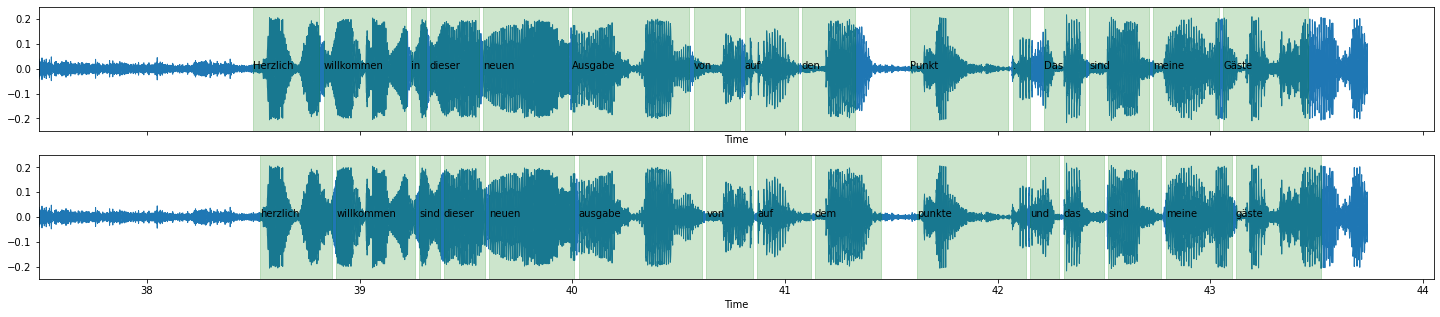

In [91]:
def plot_audio_segments(ax, audio, segments, sr=16000, label_col='name'):
    librosa.display.waveplot(audio, ax=ax, sr=sr)
    
    for idx, row in segments.iterrows():
        s = row.start + 0.01
        e = row.end - 0.01
        ax.axvspan(ymin=-1.0, ymax=1.0, xmin=s, xmax=e, color='green', alpha=0.2)
        ax.text(x=s, s=row[label_col], y=0.0)

fig, (ax1, ax2) = plt.subplots(2, figsize=(25, 5), sharex=True, sharey=True)
start = positions.iloc[0].time - 1.0
end = positions.iloc[-1].time + 1.0 

def filter_time(df):
    return df[(df.start > start) & (df.end < end)]
    
plot_audio_segments(ax1, y, filter_time(positions))
plot_audio_segments(ax2, y, filter_time(extracted), label_col='word')

ax1.set_xlim(start, end)